<a href="https://colab.research.google.com/github/soconzan/2024-2-dl/blob/main/cnn_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

# CIFAR-10 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 이미지 데이터 정규화 (0~255 범위의 값을 0~1로 변경)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 라벨을 One-hot 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [ ]:
# ResNet50 모델 로드 (Imagenet 사전학습 가중치 사용, Fully connected layer 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 새로운 레이어 추가
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())  # GlobalAveragePooling으로 차원 축소
model.add(layers.Dense(512, activation='relu'))  # Fully connected layer 추가
model.add(layers.Dense(10, activation='softmax'))  # CIFAR-10에 맞는 10개 클래스 분류

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 최적 가중치 저장 콜백 설정
checkpoint = ModelCheckpoint('best_resnet50_cifar10_model.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

# 모델 학습 (저장 콜백 포함)
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint])

# 모델 저장
model.save('resnet50_cifar10_model.keras')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 71ms/step - accuracy: 0.5215 - loss: 1.5270 - val_accuracy: 0.3029 - val_loss: 2.4961
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7250 - loss: 0.8116 - val_accuracy: 0.6346 - val_loss: 1.1514
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.7730 - loss: 0.6680 - val_accuracy: 0.6900 - val_loss: 0.9193
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8090 - loss: 0.5705 - val_accuracy: 0.7024 - val_loss: 0.9375
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.8319 - loss: 0.4989 - val_accuracy: 0.6454 - val_loss: 1.3551
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.8340 - loss: 0.4857 - val_accuracy: 0.7594 - val_loss: 0.7885
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8726 - loss: 0.3789 - val_accuracy: 0.7100 - val_loss: 0.9268
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.8683 - loss: 0.3942 -

In [ ]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# 예측
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7383 - loss: 0.9187
Test Accuracy: 0.7371000051498413
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,819,552 (281.60 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 49,177,622 (187.60 MB)

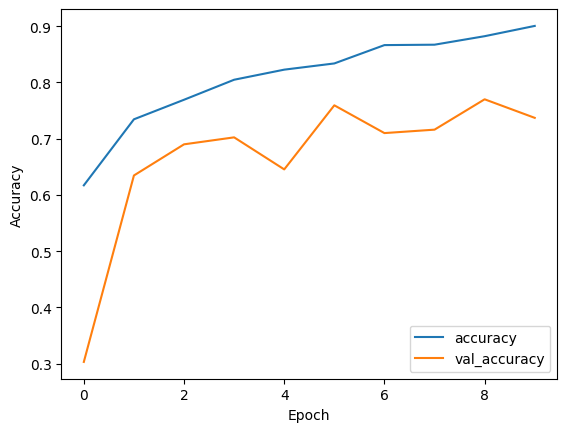

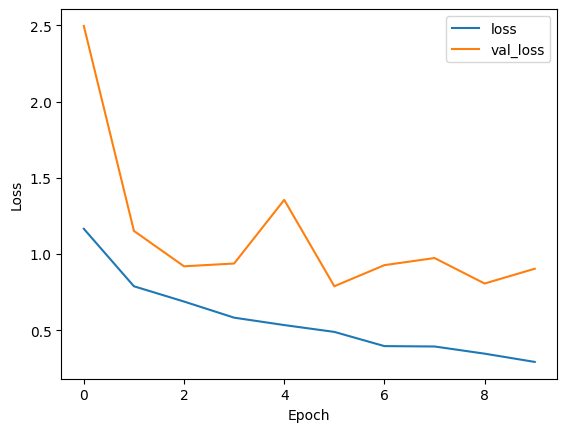

In [ ]:
# 모델 구조 요약
model.summary()

# 학습 정확도 및 손실 시각화
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# 손실 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()